# Connectome Measurements

We consider approaches to measure connectome phenomena of a brain circuit.

In [1]:
#essential imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from dmt.tk.phenomenon import Phenomenon
from dmt.tk.parameters import Parameters
from dmt.tk.plotting import Bars, LinePlot, HeatMap
from neuro_dmt import terminology
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.connectome\
    import ConnectomeAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


We define some methods to load circuits from their location.

In [2]:
#paths to circuits
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")


We will use the *BioM* circuit for analyzing.
To analyze a circuit model, we will also need an adapter.

In [3]:
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()


# Mock Circuit
We will test our connectome measurement tools against a mock circuit.

In [4]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                    

34it [00:00, 337.45it/s]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/builder.py Logger
DEBUGINFO@<2020-02-25 17:25:59>                                                 
Mock circuit builder: get_connectome(...)



82304it [03:10, 431.50it/s]


Set the circuit model to work with:

In [8]:
circuit_model = mock_circuit_model

# Pathway Measurement

We will use our tool `PathwayMeasurement` to make measurment on pathways of the 
circuit connectome.

In [5]:
from importlib import reload
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import pathway_measurement

In [8]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses import tools

measurement_connections_afferent_random_serial =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.serial,
        batch_size=1)
measurement_connections_afferent_random_batch =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100)
measurement_connections_afferent_exh =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100)

In [14]:
measurement_connections_afferent_random_serial.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 215

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 189

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L23_ChC      2.0
L23_MC       4.0
L23_SBC      2.0
L4_LBC       3.0
            ... 
L6_IPC      19.0
L6_MC        3.0
L6_TPC:A    24.0
L6_TPC:B    21.0
L6_UPC      24.0
Name: number_connections_afferent, Length: 357, dtype: float64

In [15]:
measurement_connections_afferent_random_batch.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 3915



(pre_synaptic_cell, mtype)
L1_DAC     1.0
L1_DAC     3.0
L1_DAC     1.0
L1_DAC     4.0
L1_DAC     1.0
          ... 
L6_UPC    20.0
L6_UPC    21.0
L6_UPC    16.0
L6_UPC    12.0
L6_UPC    15.0
Name: number_connections_afferent, Length: 354, dtype: float64

In [16]:
measurement_connections_afferent_exh.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20088

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20078

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19848

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19961

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19919

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20204

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19930

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19903

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20108

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19907

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20304

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19989

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19824

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20108

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

(pre_synaptic_cell, mtype)
L1_DAC     1.0
L1_DAC     3.0
L1_DAC     1.0
L1_DAC     1.0
L1_DAC     1.0
          ... 
L6_UPC    18.0
L6_UPC    25.0
L6_UPC    15.0
L6_UPC    22.0
L6_UPC    26.0
Name: number_connections_afferent, Length: 153506, dtype: float64

### Connection Probability

Because the circuit may be very large, we will have to subset its cells to 
compute connection probability. Let us see how we can achieve this using
`PathwayMeasurement`.

Connection probability of a pathway is the number of connections between 
the pre and post cell groups divided by the total number of (pre, post) pairs.
For a given post-synaptic cell, we can compute the number of connections as 
the number of afferent connections:

In [295]:
self =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=True,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100,
        fraction_circuit_cells=0.1,
        summaries="sum")
#number_affcons =\
#    self.collect(
#        circuit_model, adapter,
#        post_synaptic_cell={"mtype": "L6_TPC:A"})

The `PathwayMeasurement` we defined above subsets cells in the circuit to derive
a pool of cells in which all the circuit mtypes are represented. A fixed fraction
of all the circuit cells are chosen for each mtype.
The resulting `pandas.Series` gives us the number of afferent connections from
cells of each *mtype* among the pool of cells to each of the post synaptic cell 
among the pool of cells that has *mtype* *L6_TPC:A*.  


Summed over all the *L6_TPC:A* cells in the pool,
the number of afferent connections will thus be the number of connections 
afferent on the *cell group L6_TPC:A*.

In [255]:
self.norm_per_pair(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19725

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19986

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

L1_DAC      0.002138
L1_SLAC     0.002641
L23_ChC     0.002294
L23_MC      0.002625
L23_SBC     0.002473
L4_LBC      0.002440
L4_NGC      0.002456
L4_TPC      0.002424
L5_DBC      0.002508
L5_MC       0.002306
L5_TPC:A    0.002447
L5_TPC:B    0.002447
L5_UPC      0.002471
L6_ChC      0.002472
L6_IPC      0.002447
L6_MC       0.002380
L6_TPC:A    0.002354
L6_TPC:B    0.002270
L6_UPC      0.002455
dtype: float64

So now we have our connection probability:

In [7]:
#reload the adapter after changes in its code!
from neuro_dmt.models.bluebrain.circuit.adapter import adapter as ad
reload(ad)
adapter = ad.BlueBrainCircuitAdapter()
reload(pathway_measurement)
pwymeas =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="Pconn",
        specifiers_cell_type=["mtype"],
        by_soma_distance=True,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100,
        fraction_circuit_cells=0.1)
number_connections_pathway =\
    pwymeas.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"},
        aggregators="sum")

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


NameError: name 'circuit_model' is not defined

In [100]:
print(pwymeas.using_subset_of_cells)
print(pwymeas.connectivity)
print(number_connections_pathway.shape)
number_connections_pathway

True
Connectivity.CIRCUIT
(174,)


(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1150.0            12.0
                            1250.0            16.0
                            1350.0            13.0
                            1450.0            13.0
                            1550.0            13.0
                                             ...  
L6_UPC                      250.0            515.0
                            350.0            297.0
                            450.0            205.0
                            550.0            108.0
                            650.0             27.0
Name: Pconn, Length: 174, dtype: float64

In [101]:
cpwymeas =\
    pwymeas.with_field_values(
        connectivity=pathway_measurement.Connectivity.COMPLETE,
        cache_cells=pwymeas.cache_cells)
number_pairs_pathway =\
    cpwymeas.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"},
        aggregators="sum")

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive



In [102]:
print(cpwymeas.using_subset_of_cells)
print(cpwymeas.connectivity)
print(number_pairs_pathway.shape)
number_pairs_pathway

True
Connectivity.COMPLETE
(189,)


(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1050.0              106.0
                            1150.0             4024.0
                            1250.0             6931.0
                            1350.0             7367.0
                            1450.0             7493.0
                                               ...   
L6_UPC                      350.0            130689.0
                            450.0             82437.0
                            550.0             43317.0
                            650.0              7920.0
                            750.0                 2.0
Name: Pconn, Length: 189, dtype: float64

Cache of cells must be the same:

In [103]:
pd.testing.assert_frame_equal(
    pwymeas.cache_cells[circuit_model],
    cpwymeas.cache_cells[circuit_model])

In [105]:
pconn_2 =\
    number_connections_pathway / number_pairs_pathway
pconn_2.dropna()

(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1150.0           0.002982
                            1250.0           0.002308
                            1350.0           0.001765
                            1450.0           0.001735
                            1550.0           0.001828
                                               ...   
L6_UPC                      250.0            0.002430
                            350.0            0.002273
                            450.0            0.002487
                            550.0            0.002493
                            650.0            0.003409
Name: Pconn, Length: 174, dtype: float64

In [9]:
pconn =\
    pwymeas.norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
pconn

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 17:25:59>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 17:25:59>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19836

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 17:25:59>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 20036

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1050.0           0.003584
                            1150.0           0.002540
                            1250.0           0.002318
                            1350.0           0.002247
                            1450.0           0.001880
                                               ...   
L6_UPC                      250.0            0.002461
                            350.0            0.002388
                            450.0            0.002642
                            550.0            0.002438
                            650.0            0.003391
Name: Pconn, Length: 188, dtype: float64

{'x': 0    1050.0
1    1150.0
2    1250.0
3    1350.0
4    1450.0
5    1550.0
6    1650.0
7    1750.0
8    1850.0
Name: soma_distance, dtype: float64, 'y': 0    0.003584
1    0.002540
2    0.002318
3    0.002247
4    0.001880
5    0.003024
6    0.002848
7    0.001732
8    0.002141
Name: Pconn, dtype: float64, 'hue': None, 'style': None, 'size': None, 'units': None}
{'x': 1    1150.0
2    1250.0
3    1350.0
4    1450.0
5    1550.0
6    1650.0
7    1750.0
8    1850.0
Name: soma_distance, dtype: float64, 'y': 1    0.002438
2    0.002649
3    0.002407
4    0.002627
5    0.003130
6    0.002965
7    0.002207
8    0.003460
Name: Pconn, dtype: float64, 'hue': None, 'style': None, 'size': None, 'units': None}
{'x': 1      750.0
2      850.0
3      950.0
4     1050.0
5     1150.0
6     1250.0
7     1350.0
8     1450.0
9     1550.0
10    1650.0
11    1750.0
Name: soma_distance, dtype: float64, 'y': 1     0.001691
2     0.002555
3     0.002266
4     0.002200
5     0.002313
6     0.002438
7     0.0

OrderedDict([('L1_DAC', <dmt.tk.plotting.figure.Figure at 0x12bc10410>),
             ('L1_SLAC', <dmt.tk.plotting.figure.Figure at 0x12c32a710>),
             ('L23_ChC', <dmt.tk.plotting.figure.Figure at 0x1242e6750>),
             ('L23_MC', <dmt.tk.plotting.figure.Figure at 0x12156dc10>),
             ('L23_SBC', <dmt.tk.plotting.figure.Figure at 0x1214fcf10>),
             ('L4_LBC', <dmt.tk.plotting.figure.Figure at 0x124136fd0>),
             ('L4_NGC', <dmt.tk.plotting.figure.Figure at 0x123eca550>),
             ('L4_TPC', <dmt.tk.plotting.figure.Figure at 0x1229f7a50>),
             ('L5_DBC', <dmt.tk.plotting.figure.Figure at 0x1229f72d0>),
             ('L5_MC', <dmt.tk.plotting.figure.Figure at 0x123ab8cd0>),
             ('L5_TPC:A', <dmt.tk.plotting.figure.Figure at 0x123a30c50>),
             ('L5_TPC:B', <dmt.tk.plotting.figure.Figure at 0x123a08950>),
             ('L5_UPC', <dmt.tk.plotting.figure.Figure at 0x123713d50>),
             ('L6_ChC', <dmt.tk.plotting.figu

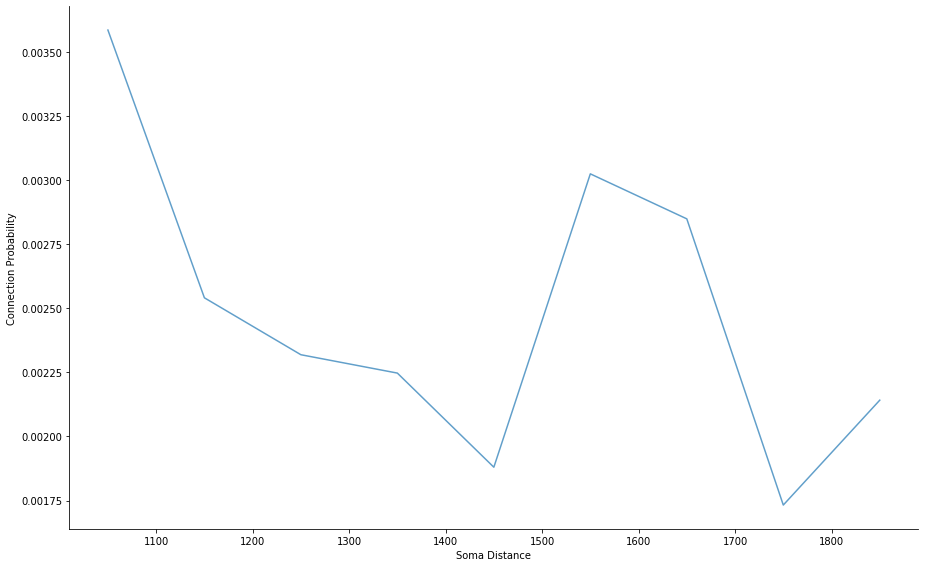

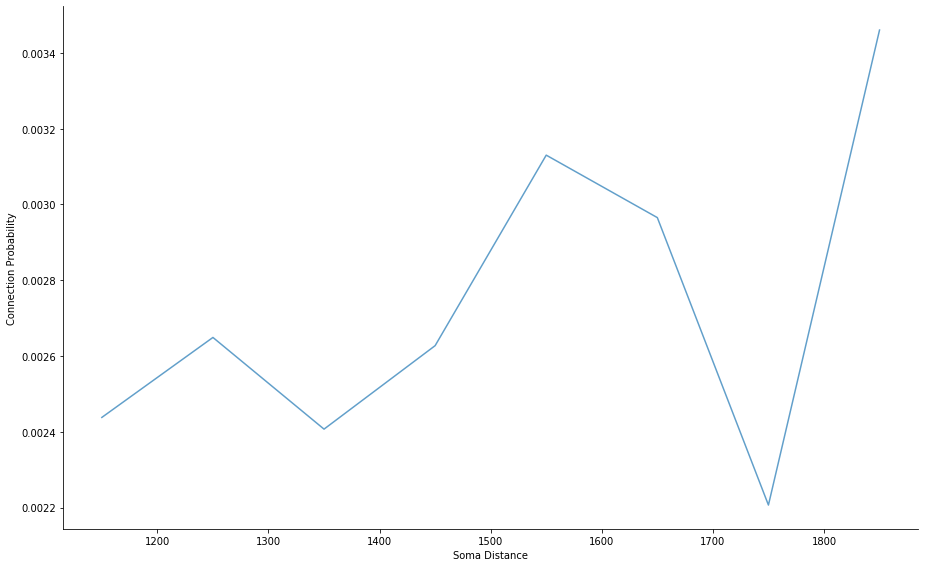

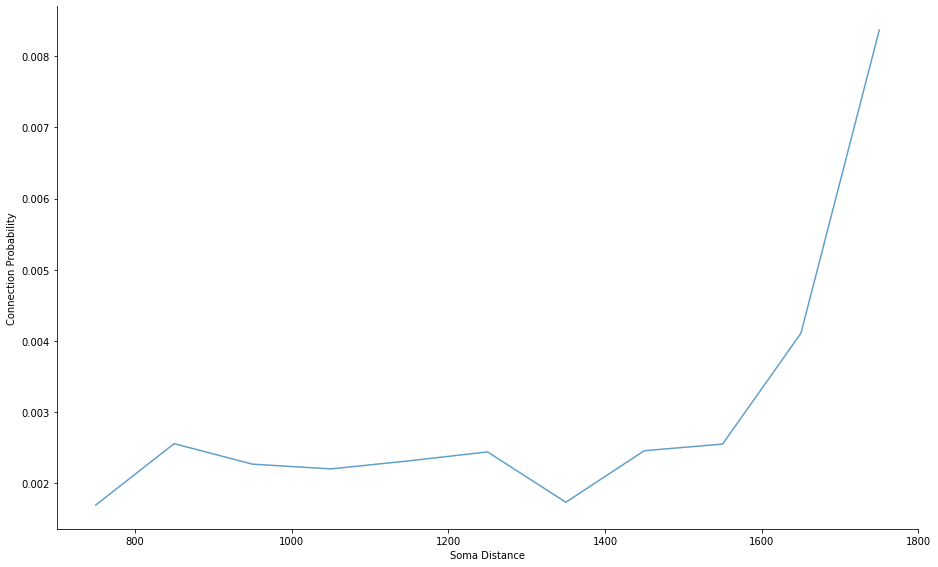

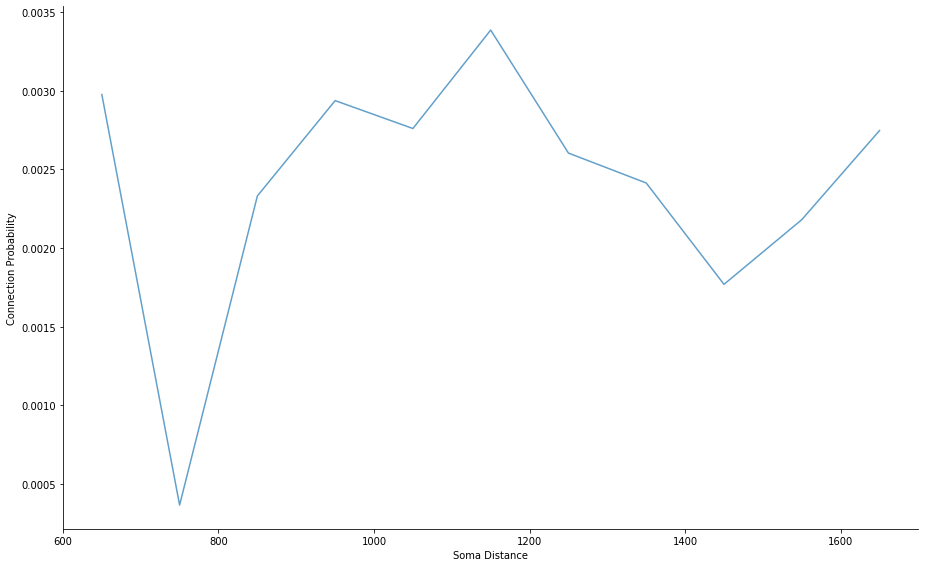

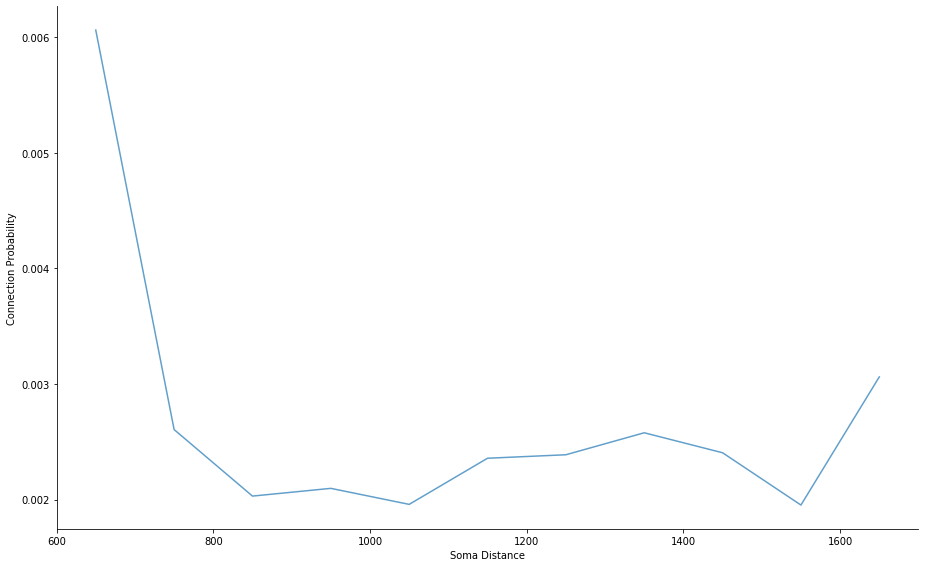

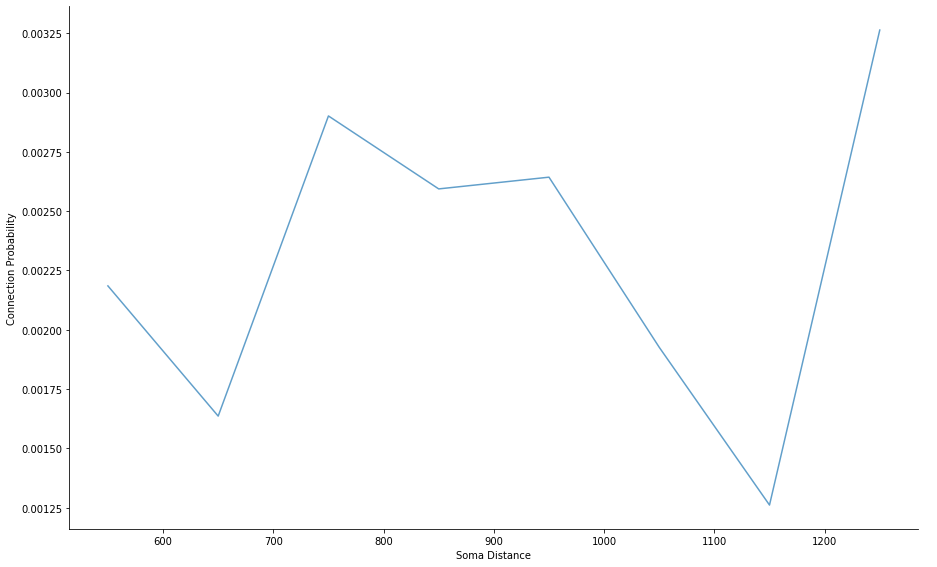

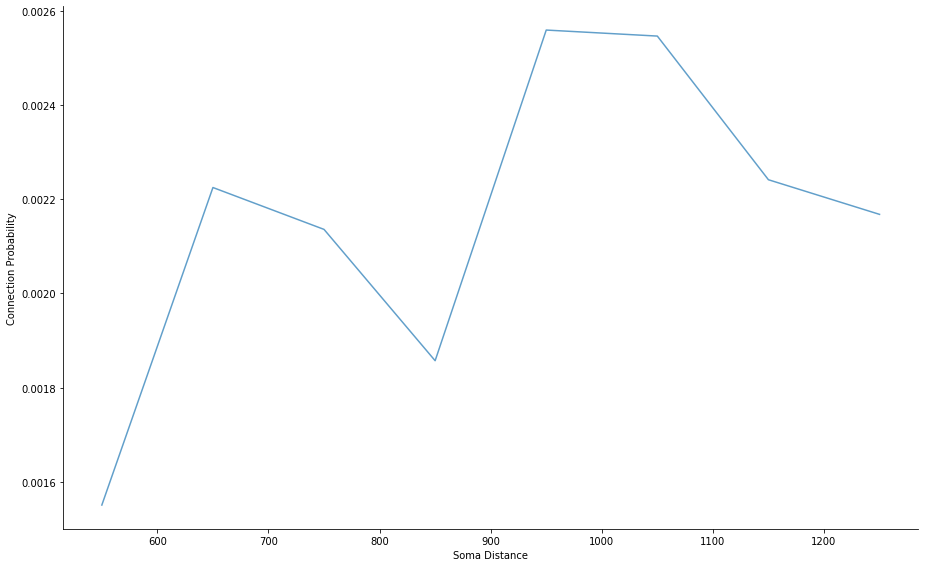

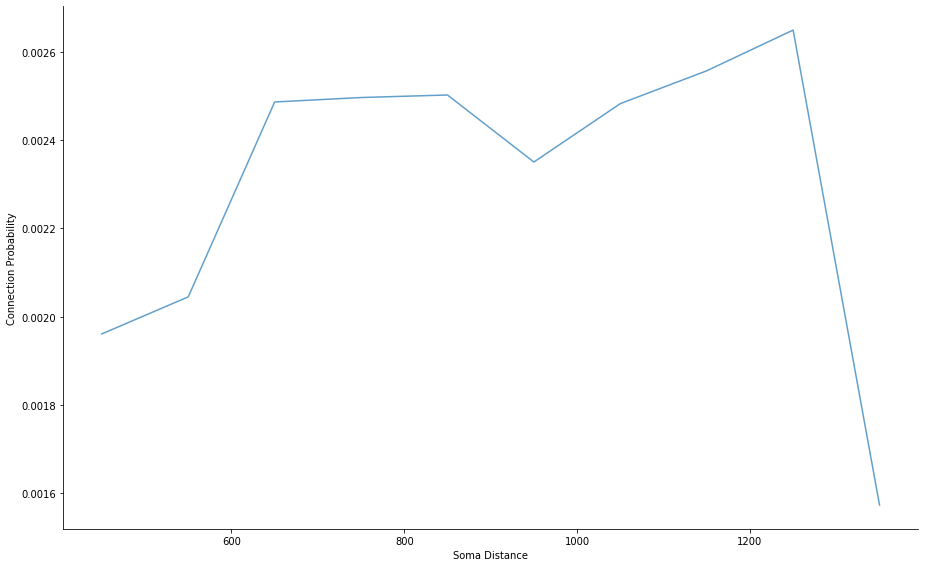

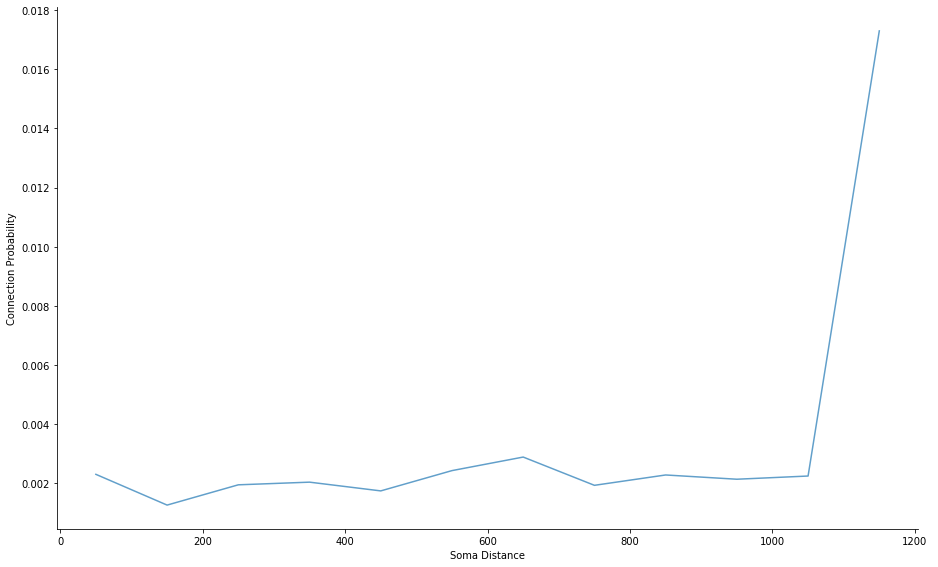

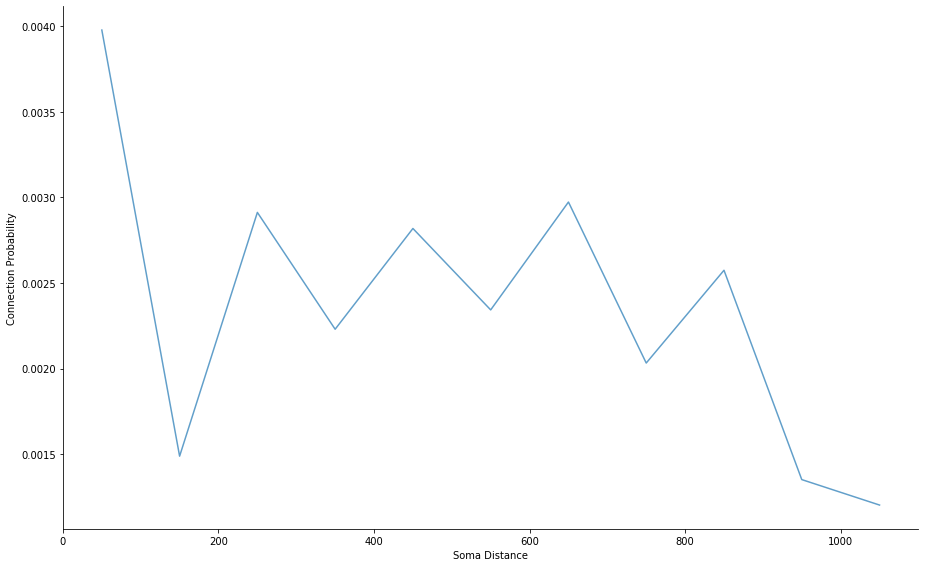

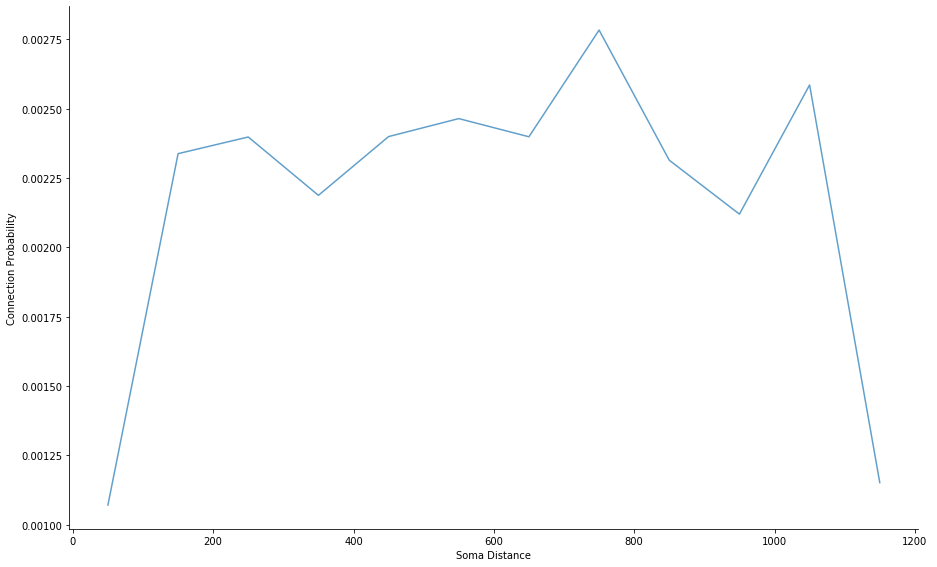

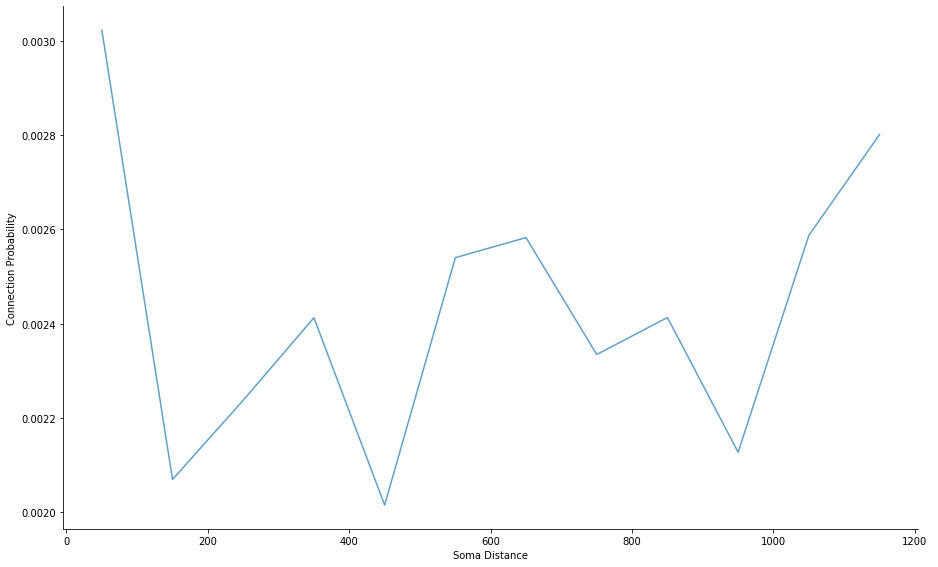

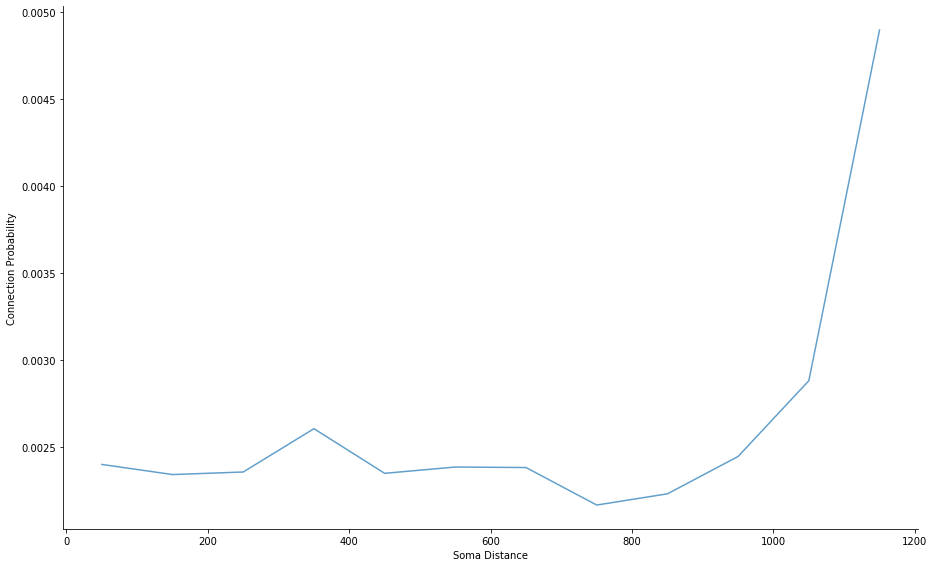

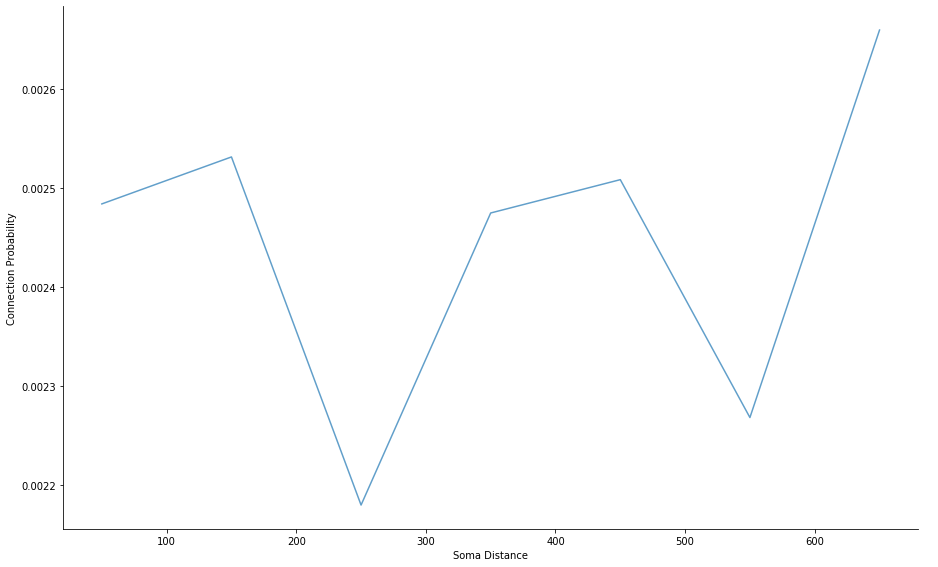

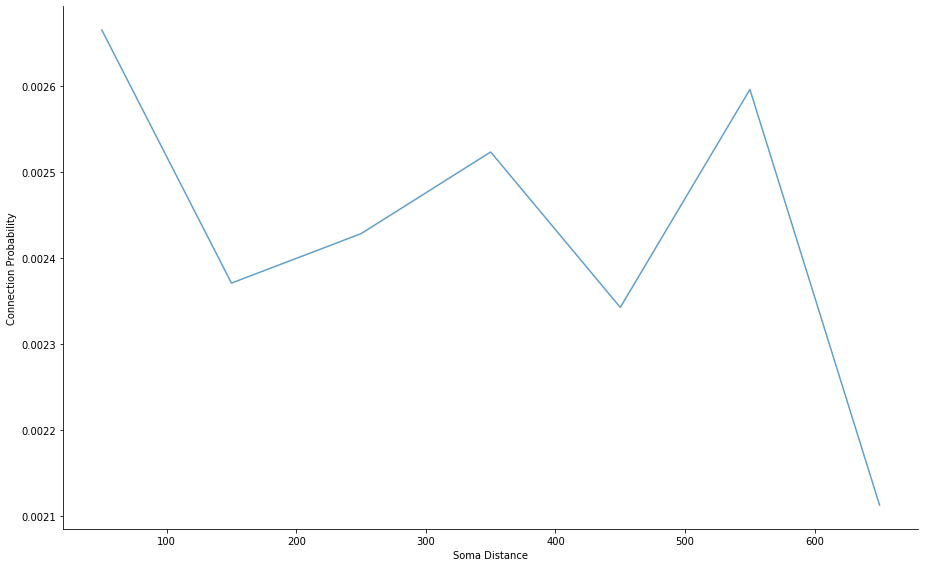

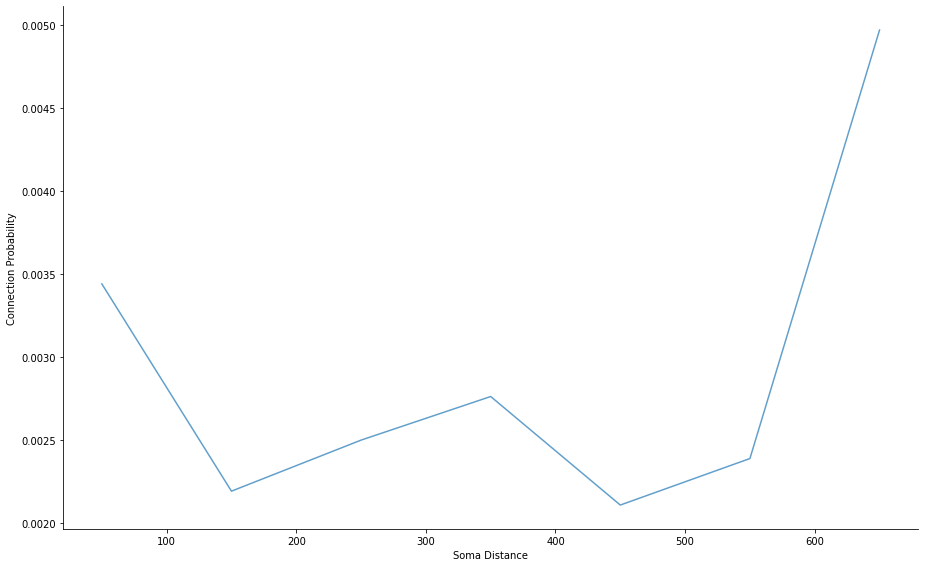

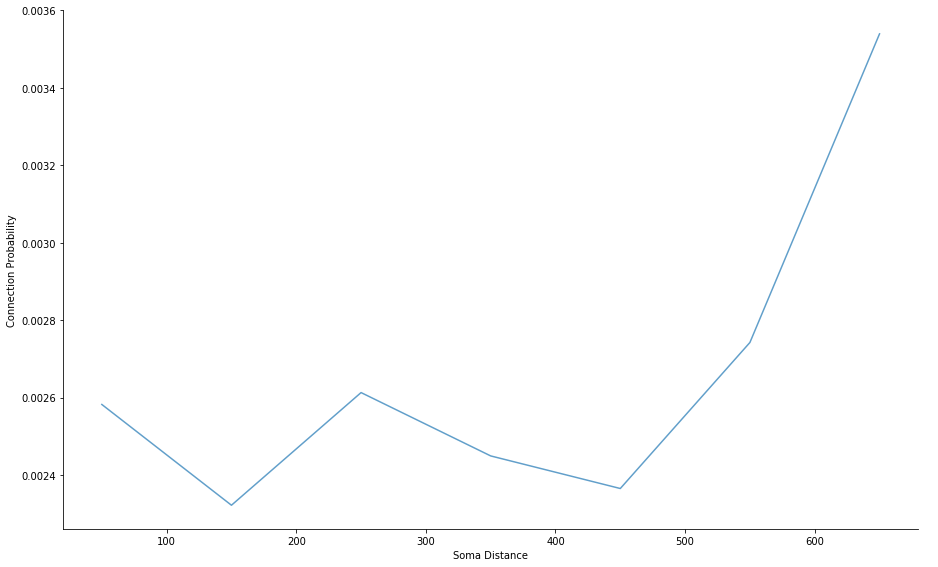

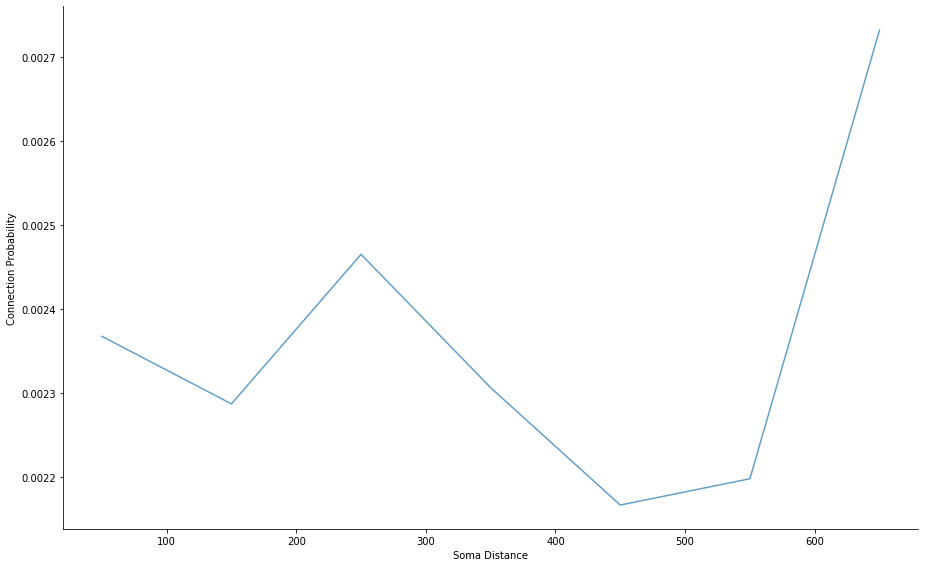

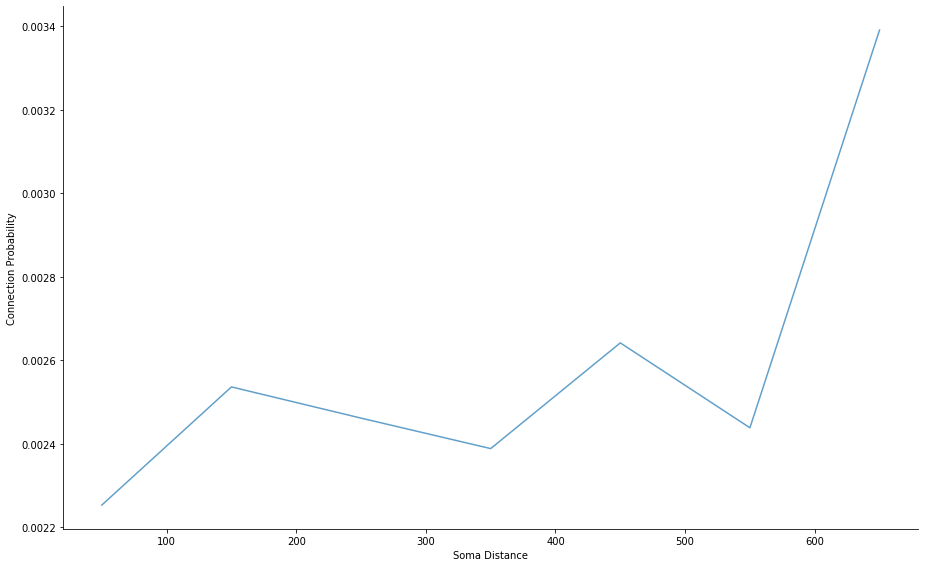

In [18]:
from dmt.tk.plotting import lines, multi
reload(lines)
reload(multi)
line_plot =\
    multi.MultiPlot(
        mvar=("pre_synaptic_cell", "mtype"),
        plotter=lines.LinePlot(
            xvar="soma_distance",
            xlabel="Soma Distance",
            yvar="Pconn",
            ylabel="Connection Probability"))

line_plot.get_figures(pconn)

In [19]:
dataframe =\
    pconn.reset_index()
mtype_counts =\
    dataframe[("pre_synaptic_cell", "mtype")].value_counts()
markers_known =[
    "o", "v", "^", "<", ">",  "8", "s", "p", "P", "*",
    "X", "d", "D",  "h", "H"]
def get_markers(series):
    return {
        value: markers_known[index % len(markers_known)]
        for index, value in series.iteritems()}
get_markers(dataframe[("pre_synaptic_cell", "mtype")])

{'L1_DAC': 'P',
 'L1_SLAC': '^',
 'L23_ChC': 'H',
 'L23_MC': 'd',
 'L23_SBC': 'P',
 'L4_LBC': '<',
 'L4_NGC': 'h',
 'L4_TPC': 'P',
 'L5_DBC': '8',
 'L5_MC': '^',
 'L5_TPC:A': 'H',
 'L5_TPC:B': 'd',
 'L5_UPC': 'P',
 'L6_ChC': 'o',
 'L6_IPC': 'P',
 'L6_MC': 'o',
 'L6_TPC:A': 'P',
 'L6_TPC:B': 'o',
 'L6_UPC': 'p'}

{'x': 0       18
1       14
2       18
3       18
4       18
        ..
1059     8
1060     7
1061     7
1062     7
1063     0
Name: timepoint, Length: 1064, dtype: int64, 'y': 0      -0.017552
1      -0.080883
2      -0.081033
3      -0.046134
4      -0.037970
          ...   
1059    0.018165
1060   -0.029130
1061   -0.004939
1062   -0.025367
1063   -0.006899
Name: signal, Length: 1064, dtype: float64, 'hue': 0       stim
1       stim
2       stim
3       stim
4       stim
        ... 
1059     cue
1060     cue
1061     cue
1062     cue
1063     cue
Name: event, Length: 1064, dtype: object, 'style': 0       stim
1       stim
2       stim
3       stim
4       stim
        ... 
1059     cue
1060     cue
1061     cue
1062     cue
1063     cue
Name: event, Length: 1064, dtype: object, 'size': None, 'units': None}


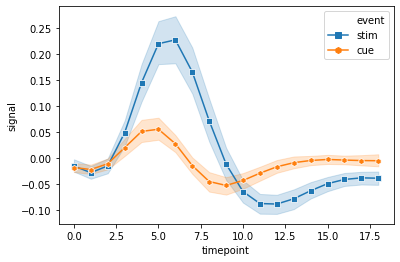

In [20]:
import seaborn
fmri =\
    seaborn.load_dataset("fmri")
seaborn.lineplot(
    x="timepoint", y="signal",
    hue="event", style="event",
    markers=get_markers(fmri.event), dashes=False,
    data=fmri)

{'x': 0      1050.0
1      1150.0
2      1250.0
3      1350.0
4      1450.0
        ...  
183     250.0
184     350.0
185     450.0
186     550.0
187     650.0
Name: soma_distance, Length: 188, dtype: float64, 'y': 0      0.003584
1      0.002540
2      0.002318
3      0.002247
4      0.001880
         ...   
183    0.002461
184    0.002388
185    0.002642
186    0.002438
187    0.003391
Name: Pconn, Length: 188, dtype: float64, 'hue': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
183    L6_UPC
184    L6_UPC
185    L6_UPC
186    L6_UPC
187    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 188, dtype: object, 'style': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
183    L6_UPC
184    L6_UPC
185    L6_UPC
186    L6_UPC
187    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 188, dtype: object, 'size': None, 'units': None}


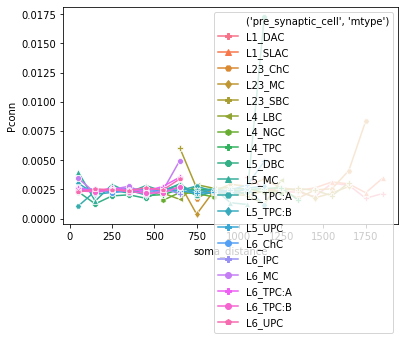

In [21]:
import seaborn

seaborn.lineplot(
    x="soma_distance",
    y="Pconn",
    style=("pre_synaptic_cell", "mtype"),
    dashes=False,
    hue=("pre_synaptic_cell", "mtype"),
    markers=get_markers(dataframe[("pre_synaptic_cell", "mtype")]),
    data=dataframe)

{'x': 0    1050.0
1    1150.0
2    1250.0
3    1350.0
4    1450.0
5    1550.0
6    1650.0
7    1750.0
8    1850.0
Name: soma_distance, dtype: float64, 'y': 0    0.003584
1    0.002540
2    0.002318
3    0.002247
4    0.001880
5    0.003024
6    0.002848
7    0.001732
8    0.002141
Name: Pconn, dtype: float64, 'hue': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
172    L6_UPC
173    L6_UPC
174    L6_UPC
175    L6_UPC
176    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 177, dtype: object, 'style': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
172    L6_UPC
173    L6_UPC
174    L6_UPC
175    L6_UPC
176    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 177, dtype: object, 'size': None, 'units': None}
{'x': 9     1150.0
10    1250.0
11    1350.0
12    1450.0
13    1550.0
14    1650.0
15    1750.0
16    1850.0
Name: soma_distance, dtype: float64, 'y': 9     0.002438
10    0.002649
11    0.002407
12    0.002627


{'x': 99       50.0
100     150.0
101     250.0
102     350.0
103     450.0
104     550.0
105     650.0
106     750.0
107     850.0
108     950.0
109    1050.0
110    1150.0
Name: soma_distance, dtype: float64, 'y': 99     0.001071
100    0.002338
101    0.002398
102    0.002187
103    0.002399
104    0.002464
105    0.002399
106    0.002783
107    0.002314
108    0.002120
109    0.002585
110    0.001152
Name: Pconn, dtype: float64, 'hue': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
172    L6_UPC
173    L6_UPC
174    L6_UPC
175    L6_UPC
176    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 177, dtype: object, 'style': 0      L1_DAC
1      L1_DAC
2      L1_DAC
3      L1_DAC
4      L1_DAC
        ...  
172    L6_UPC
173    L6_UPC
174    L6_UPC
175    L6_UPC
176    L6_UPC
Name: (pre_synaptic_cell, mtype), Length: 177, dtype: object, 'size': None, 'units': None}
{'x': 111      50.0
112     150.0
113     250.0
114     350.0
115     450.0
116     55

OrderedDict([('Pconn', <dmt.tk.plotting.figure.Figure at 0x1296dab50>)])

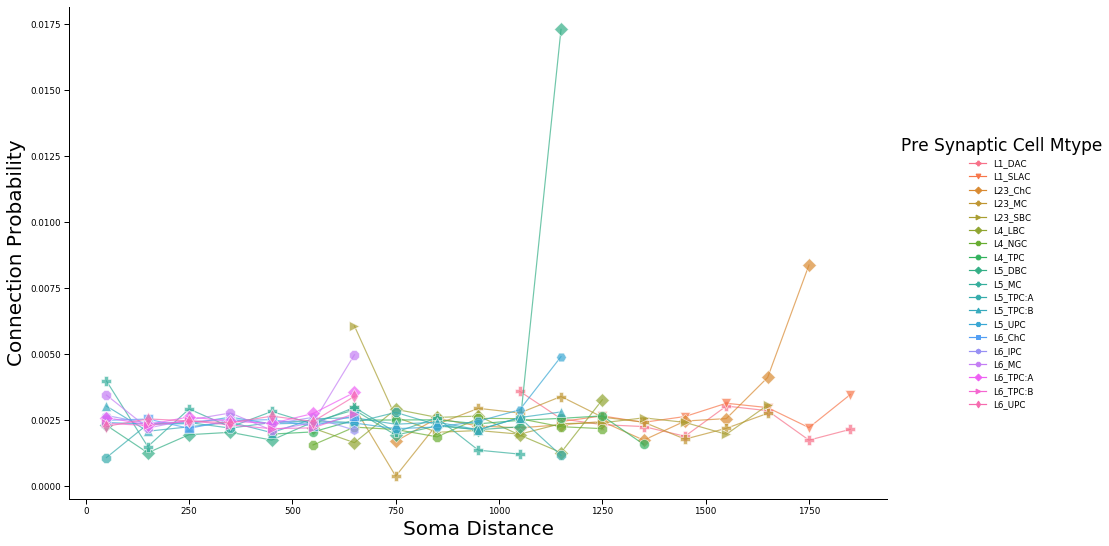

In [27]:
reload(lines)
line_plot =\
    lines.LinePlot(
        xvar="soma_distance",
        xlabel="Soma Distance",
        yvar="Pconn",
        ylabel="Connection Probability",
        gvar=("pre_synaptic_cell", "mtype"),
        marker_size=10)
line_plot(pconn.reset_index().dropna())

In [16]:
reload(seaborn)
self = line_plot
grid =\
    seaborn.FacetGrid(\
        dataframe,
        col=self.fvar if self.fvar else None,
        hue=self.gvar if self.gvar else None,
        hue_order=self.gvar_order if self.gvar_order else None,
        hue_kws=self.gvar_kwargs if self.gvar_kwargs else None,
        col_wrap=self.number_columns,
        height=self.height_figure,
        aspect=self.aspect_ratio_figure,
        legend_out=True)
grid.map(
    seaborn.lineplot,
    self.xvar,
    self.yvar,
    drawstyle=self.drawstyle,
    alpha=0.7,
    dashes=False,
    style=self.gvar if self.gvar else None,
    markers=self._get_markers(dataframe[self.gvar]))
    #ms=self.marker_size)

NameError: name 'line_plot' is not defined

In [ ]:
.set_titles(
    _make_name(self.fvar) + "\n{col_name} "
).add_legend(
    title=_make_name(self.gvar))


In [97]:
from dmt.tk.collections import take
cells =\
    pwymeas._sample_cells(
        circuit_model, adapter, {"mtype": "L6_TPC:A"})
pairs =\
    pd.concat([
        pwymeas.get_pairs(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32))
        for batch in  pwymeas._batches(cells)])
cnxns_circuit =\
    pd.concat([
        pwymeas.get_connections(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32),
            connectivity=pathway_measurement.Connectivity.CIRCUIT)
        for batch in pwymeas._batches(cells)])
cnxns_complete =\
    pd.concat([
        cpwymeas.get_connections(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32),
            connectivity=pathway_measurement.Connectivity.COMPLETE)
        for batch in cpwymeas._batches(cells)])
print("pairs: ", pairs.shape)
print(cpwymeas.connectivity,
      cpwymeas.sampling_methodology,
      cpwymeas.processing_methodology,
      "connections", cnxns_complete.shape)
print(pwymeas.connectivity,
      pwymeas.sampling_methodology,
      pwymeas.processing_methodology,
      "connections", cnxns_circuit.shape)
cnxns_complete.head()

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 20088

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19815

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19854

/Users/vishalsoodmuchu/.vmgr_repo/

,post_gid,pre_gid,strength
0,14197,61772,1.0
1,14197,41209,1.0
2,14197,61807,1.0
3,14197,41183,1.0
4,14197,125,1.0


In [91]:
cpwymeas.connectivity == Connectivity.COMPLETE

True

In [19]:
batches_cells =\
    list(pwymeas._batches(cells))
print(len(batches_cells))
ncnxns_circuit =\
    pwymeas._method(
        circuit_model, adapter,
        batches_cells[0],
        pwymeas.specifiers_cell_type,
        by_soma_distance=pwymeas.by_soma_distance,
        bin_size_soma_distance=pwymeas.bin_size_soma_distance)
ncnxns_complete =\
    cpwymeas._method(
        circuit_model, adapter,
        batches_cells[0],
        cpwymeas.specifiers_cell_type,
        by_soma_distance=cpwymeas.by_soma_distance,
        bin_size_soma_distance=cpwymeas.bin_size_soma_distance)

9
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 20097



In [20]:
ncnxns_complete.groupby("mtype").agg("sum")

mtype
L6_TPC:A    10000.0
Name: Pconn, dtype: float64

In [21]:
ncnxns_circuit.groupby("mtype").agg("sum")

mtype
L1_DAC       14.0
L1_SLAC      16.0
L23_ChC      36.0
L23_MC       34.0
L23_SBC      23.0
L4_LBC        9.0
L4_NGC       20.0
L4_TPC      359.0
L5_DBC       49.0
L5_MC        44.0
L5_TPC:A    151.0
L5_TPC:B    144.0
L5_UPC      158.0
L6_ChC       43.0
L6_IPC      215.0
L6_MC        44.0
L6_TPC:A    220.0
L6_TPC:B    247.0
L6_UPC      199.0
Name: Pconn, dtype: float64

In [22]:
connections =\
    cpwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
print(connections.shape)
connections.head()

(822200, 3)


,pre_gid,post_gid,strength
0,14193,20591,1.0
1,14196,20591,1.0
2,14199,20591,1.0
3,14213,20591,1.0
4,14230,20591,1.0


In [24]:
cells_connected =\
    cpwymeas.get_connected_cells(
        cpwymeas.get_cells(circuit_model, adapter),
        connections)

In [25]:
print(cells_connected.shape)
cells_connected.head()

(822200, 13)


,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid,group,post_gid
14193,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,172.017317,1535.259807,150.693774,14193,16,20591
14196,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,236.066422,1399.424982,53.809452,14196,16,20591
14199,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,110.528354,1611.209486,70.158824,14199,16,20591
14213,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,231.181435,1721.865275,47.455481,14213,16,20591
14230,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,155.014646,1446.428497,174.044322,14230,16,20591


Test if pairs are counted correctly.

In [73]:
batches_cells[0].mtype.value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [27]:
cnxns_circuit =\
    pwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
cnxns_complete =\
    cpwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
cnxns_complete.head()

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 13:36:08>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 20097



,pre_gid,post_gid,strength
0,14193,20591,1.0
1,14196,20591,1.0
2,14199,20591,1.0
3,14213,20591,1.0
4,14230,20591,1.0


In [65]:
print(pwymeas.label_gid, cpwymeas.label_gid)
print(pwymeas.label_other_gid, cpwymeas.label_other_gid)
print(pwymeas.connectivity)
print(cnxns_circuit.post_gid.unique())
print(70*"-")
print(cpwymeas.connectivity)
print(cnxns_complete.post_gid.unique())

post_gid post_gid
pre_gid pre_gid
Connectivity.CIRCUIT
[14193 14196 14199 14213 14230 14242 14247 14250 14251 14260 14276 14295
 14319 14324 14334 14336 14337 14346 14347 14356 14361 14373 14383 14384
 14391 14402 14417 14428 14430 14437 14440 14453 14459 14494 14496 14498
 14501 14519 14544 14560 14562 14570 14613 14617 14624 14635 14651 14657
 14683 14715 14721 14729 14739 14758 14772 14777 14828 14853 14858 14872
 14874 14886 14887 14905 14922 14939 14941 14950 14965 14966 14976 15001
 15010 15011 15014 15017 15021 15030 15045 15047 15075 15086 15093 15105
 15108 15118 15119 15121 15141 15145 15147 15151 15154 15157 15175 15176
 15186 15187 15223 15233]
----------------------------------------------------------------------
Connectivity.COMPLETE
[20591 61730 61749 ... 19149 39472 60257]


In [69]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_complete.post_gid.unique()]\
       .mtype\
       .value_counts()

L4_TPC      1461
L6_TPC:B     852
L6_TPC:A     852
L6_UPC       852
L6_IPC       852
L5_UPC       648
L5_TPC:B     648
L5_TPC:A     648
L5_DBC       197
L5_MC        197
L6_ChC       179
L6_MC        179
L23_ChC      131
L23_MC       131
L23_SBC      131
L4_NGC        76
L4_LBC        76
L1_SLAC       56
L1_DAC        56
Name: mtype, dtype: int64

In [71]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_complete.pre_gid.unique()]\
       .mtype\
       .value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [70]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_circuit.post_gid.unique()]\
       .mtype\
       .value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [72]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_circuit.pre_gid.unique()]\
       .mtype\
       .value_counts()

L4_TPC      321
L6_TPC:A    200
L6_TPC:B    198
L6_IPC      191
L6_UPC      177
L5_UPC      140
L5_TPC:A    137
L5_TPC:B    130
L5_DBC       43
L5_MC        41
L6_ChC       39
L6_MC        37
L23_ChC      33
L23_MC       32
L23_SBC      21
L4_NGC       18
L1_SLAC      15
L1_DAC       13
L4_LBC        9
Name: mtype, dtype: int64

In [39]:
print(pwymeas.connectivity, "connections", cnxns_circuit.shape)
print(cpwymeas.connectivity, "connections", cnxns_complete.shape)
cells_connected_circuit =\
    pwymeas.get_connected_cells(pwymeas.get_cells(circuit_model, adapter),
                                cnxns_circuit)
print(pwymeas.connectivity, "cells connected", cells_connected_circuit.shape)
                                       
cells_connected_complete =\
    cpwymeas.get_connected_cells(cpwymeas.get_cells(circuit_model,adapter),
                                 cnxns_complete)
print(cpwymeas.connectivity, "cells connected", cells_connected_complete.shape)

cells_connected_circuit =\
    cells_connected_circuit.assign(**{
        pwymeas.label_gid: cnxns_circuit[pwymeas.label_gid].to_numpy(np.int32)})
print(pwymeas.connectivity,
      "cells connected assigned gids",
      cells_connected_circuit.shape)
                                        
cells_connected_complete =\
    cells_connected_complete.assign(**{
        cpwymeas.label_gid: cnxns_complete[cpwymeas.label_gid].to_numpy(np.int32)})
print(cpwymeas.connectivity,
      "cells connected assigned gids",
      cells_connected_complete.shape)

Connectivity.CIRCUIT connections (2025, 3)
Connectivity.COMPLETE connections (822200, 3)
Connectivity.CIRCUIT cells connected (2025, 13)
Connectivity.COMPLETE cells connected (822200, 13)
Connectivity.CIRCUIT cells connected assigned gids (2025, 13)
Connectivity.COMPLETE cells connected assigned gids (822200, 13)


In [32]:
print(cells_connected_circuit.shape,
      cnxns_circuit[pwymeas.label_gid].to_numpy(np.int32).shape)
print(cells_connected_complete.shape,
      cnxns_complete[cpwymeas.label_gid].to_numpy(np.int32).shape)

(2025, 13) (2025,)
(822200, 13) (822200,)


In [40]:
cells_connected_complete.head()

,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid,group,post_gid
14193,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,172.017317,1535.259807,150.693774,14193,16,20591
14196,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,236.066422,1399.424982,53.809452,14196,16,20591
14199,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,110.528354,1611.209486,70.158824,14199,16,20591
14213,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,231.181435,1721.865275,47.455481,14213,16,20591
14230,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,155.014646,1446.428497,174.044322,14230,16,20591


In [41]:
def _soma_distance(self, other_cells):
    return\
        self.get_soma_distance_bins(
            circuit_model, adapter,
            batches_cells[0],
            other_cells)
cells_connected_circuit =\
    cells_connected_circuit.assign(
        soma_distance=_soma_distance(pwymeas, cells_connected_circuit))
cells_connected_complete =\
    cells_connected_complete.assign(
        soma_distance=_soma_distance(cpwymeas, cells_connected_complete))

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py:493: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  cell_group_to[self.label_gid].to_numpy(np.int32)])


In [42]:
cells_connected_circuit.head()

,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid,group,post_gid,soma_distance
821,S1HL,3,not-defined,L23_MC,bNAC,not-defined,INH,215.191889,369.677797,235.410046,821,2,14193,1150.0
4822,S1HL,4,not-defined,L4_TPC,NAC,not-defined,EXC,121.074343,680.264527,67.676473,4822,7,14193,850.0
8109,S1HL,5,not-defined,L5_TPC:B,bNAC,not-defined,EXC,247.880146,941.395502,1.302847,8109,11,14193,650.0
17026,S1HL,6,not-defined,L6_TPC:B,bNAC,not-defined,EXC,206.197858,1310.343737,84.888919,17026,17,14193,250.0
18516,S1HL,6,not-defined,L6_UPC,bNAC,not-defined,EXC,239.747651,1386.663688,70.907114,18516,18,14193,150.0


In [48]:
n_circuit =\
    cells_connected_circuit.groupby(["mtype", "soma_distance"]).agg("size")
n_complete =\
    cells_connected_complete.groupby(["mtype", "soma_distance"]).agg("size")

In [50]:
print(pwymeas.connectivity, n_circuit.shape)
print(cpwymeas.connectivity, n_complete.shape)

Connectivity.CIRCUIT (154,)
Connectivity.COMPLETE (7,)


In [55]:
print(cells_connected_complete.mtype.unique())
print(cells_connected_circuit.mtype.unique())

['L6_TPC:A']
['L23_MC' 'L4_TPC' 'L5_TPC:B' 'L6_TPC:B' 'L6_UPC' 'L4_LBC' 'L6_TPC:A'
 'L5_TPC:A' 'L6_MC' 'L5_DBC' 'L5_MC' 'L5_UPC' 'L6_IPC' 'L23_ChC' 'L6_ChC'
 'L1_DAC' 'L1_SLAC' 'L23_SBC' 'L4_NGC']


In [329]:
print(cells.shape)
number_pairs_per_query_cell =\
    pairs.assign(number=1)\
         .groupby("post_gid").agg(["size", "count"])\
         .number["count"]\
         .value_counts()
assert len(number_pairs_per_query_cell) == 1
assert number_pairs_per_query_cell.index[0] == cells.shape[0]

(852, 12)


In [302]:
pconn =\
    pwymeas.norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19863

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19791

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py:483: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  cell_group_to[self.label_gid].to_numpy(np.int32)])


In [304]:
pconn.dropna()

(pre_synaptic_cell, mtype)  soma_distance
L6_TPC:A                    50.0             0.018050
                            150.0            0.020362
                            250.0            0.020963
                            350.0            0.019441
                            450.0            0.023814
                            550.0            0.017797
                            650.0            0.016327
Name: Pconn, dtype: float64

In [281]:
affconns_l6tpca =\
    self.collect(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19891

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19929

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

In [282]:
affconns_l6tpca.head()

(pre_synaptic_cell, mtype)
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
Name: number_connections_afferent, dtype: float64

In [100]:
affconns_l6tpca_summary_pooled =\
    self.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_pooled

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20192

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19694

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,102,112.0,1.098039,0.176855,0.298836,0.089303,1.0,1.0,2.0
L1_SLAC,114,122.0,1.070175,0.130502,0.256570,0.065828,1.0,1.0,2.0
L23_ChC,233,278.0,1.193133,0.314981,0.416828,0.173746,1.0,1.0,3.0
L23_MC,229,256.0,1.117904,0.208005,0.323201,0.104459,1.0,1.0,2.0
L23_SBC,246,287.0,1.166667,0.280488,0.394693,0.155782,1.0,1.0,3.0
L4_LBC,140,151.0,1.078571,0.144796,0.270035,0.072919,1.0,1.0,2.0
L4_NGC,151,162.0,1.072848,0.135082,0.260751,0.067991,1.0,1.0,2.0
L4_TPC,829,2931.0,3.535585,1.390435,1.698323,2.884300,1.0,3.0,10.0
L5_DBC,311,380.0,1.221865,0.362403,0.513342,0.263520,1.0,1.0,4.0


In [101]:
affconns_l6tpca_summary_batch =\
    measurement_connections_afferent_random_batch.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_batch

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 4039



,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,17,28.0,1.647059,0.685121,0.785905,0.617647,1.0,1.0,3.0
L1_SLAC,17,29.0,1.705882,0.830450,0.985184,0.970588,1.0,1.0,4.0
L23_ChC,17,60.0,3.529412,1.557093,1.874755,3.514706,1.0,4.0,7.0
L23_MC,19,59.0,3.105263,1.196676,1.696229,2.877193,1.0,3.0,8.0
L23_SBC,20,65.0,3.250000,0.950000,1.332785,1.776316,1.0,3.0,7.0
L4_LBC,18,42.0,2.333333,1.037037,1.236694,1.529412,1.0,2.0,5.0
L4_NGC,19,42.0,2.210526,1.002770,1.182227,1.397661,1.0,2.0,4.0
L4_TPC,20,718.0,35.900000,3.210000,4.411707,19.463158,28.0,36.0,45.0
L5_DBC,20,91.0,4.550000,1.450000,1.700619,2.892105,2.0,4.5,8.0


In [103]:
affconns_l6tpca_summary_exh =\
    measurement_connections_afferent_exh.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_exh

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20119

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20113

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19940

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19904

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20112

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20069

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19796

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19966

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19953

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19806

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19931

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20062

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19839

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20078

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,6314,11721.0,1.856351,0.791792,0.997916,0.995836,1.0,2.0,7.0
L1_SLAC,6338,11470.0,1.809719,0.762960,0.957724,0.917235,1.0,2.0,6.0
L23_ChC,8154,27035.0,3.315551,1.383823,1.717761,2.950704,1.0,3.0,12.0
L23_MC,8187,27264.0,3.330158,1.365193,1.691826,2.862275,1.0,3.0,12.0
L23_SBC,8161,27240.0,3.337826,1.380945,1.715615,2.943335,1.0,3.0,12.0
L4_LBC,7195,15716.0,2.184295,0.948015,1.202908,1.446987,1.0,2.0,8.0
L4_NGC,7189,15701.0,2.184031,0.958212,1.212158,1.469328,1.0,2.0,8.0
L4_TPC,8528,301666.0,35.373593,4.730253,5.931015,35.176936,13.0,35.0,61.0
L5_DBC,8462,40719.0,4.811983,1.703166,2.137952,4.570839,1.0,5.0,16.0


In [109]:
count_cells =\
    adapter.get_cells(circuit_model).mtype.value_counts()
affconns_l6tpca_summary_exh["mean"] / count_cells

L1_DAC      0.003315
L1_SLAC     0.003232
L23_ChC     0.002527
L23_MC      0.002538
L23_SBC     0.002544
L4_LBC      0.002874
L4_NGC      0.002874
L4_TPC      0.002420
L5_DBC      0.002435
L5_MC       0.002444
L5_TPC:A    0.002437
L5_TPC:B    0.002426
L5_UPC      0.002433
L6_ChC      0.002459
L6_IPC      0.002426
L6_MC       0.002481
L6_TPC:A    0.002422
L6_TPC:B    0.002424
L6_UPC      0.002427
dtype: float64

In [108]:
pool_cells =\
    self.get_cells(circuit_model, adapter)
pool_cells.mtype.value_counts()

(pre_synaptic_cell, mtype)
L1_DAC      2.175829e+04
L1_SLAC     2.075748e+04
L23_ChC     8.963591e+04
L23_MC      9.079342e+04
L23_SBC     9.092239e+04
L4_LBC      3.432837e+04
L4_NGC      3.429147e+04
L4_TPC      1.067101e+07
L5_DBC      1.959391e+05
L5_MC       1.971873e+05
L5_TPC:A    2.131731e+06
L5_TPC:B    2.112989e+06
L5_UPC      2.124780e+06
L6_ChC      1.633371e+05
L6_IPC      3.649999e+06
L6_MC       1.662815e+05
L6_TPC:A    3.637597e+06
L6_TPC:B    3.644829e+06
L6_UPC      3.652192e+06
dtype: float64

In [224]:
cell_group_from =\
    self.get_cells(circuit_model, adapter, dict(mtype="L23_MC"))
cell_group_to =\
    self.get_cells(circuit_model, adapter)
sdises =\
    pd.concat([
        pd.DataFrame({
            "gid_from": gid,
            "gid_to": cell_group_to.index.to_numpy(np.int32),
            "soma_distance": self.get_soma_distance_bins(
                            circuit_model, adapter, cell, cell_group_to)})
        for gid, cell in cell_group_from.iterrows()])

In [225]:
sdises.head()

,gid_from,gid_to,soma_distance
0,289,42,250.0
1,289,20689,150.0
2,289,41218,250.0
3,289,102,250.0
4,289,41258,150.0


('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


In [ ]:
adapter